In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

2023-12-12 10:53:11.598009: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame, results)

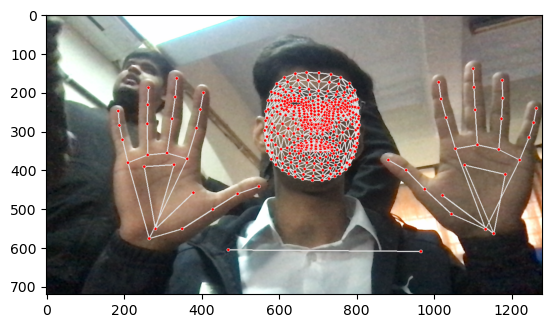

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [9]:
len(results.left_hand_landmarks.landmark)

21

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [12]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [14]:
result_test = extract_keypoints(results)

In [15]:
result_test

array([ 0.5438084 ,  0.39502203, -1.10017991, ...,  0.14582926,
        0.34711766, -0.04550203])

In [16]:
np.save('0', result_test)

In [17]:
np.load('0.npy')

array([ 0.5438084 ,  0.39502203, -1.10017991, ...,  0.14582926,
        0.34711766, -0.04550203])

In [18]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# # Folder start
# start_folder = 0

In [19]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

### 5. Collect Keypoint Values for Training and Testing

In [44]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [20]:
cap.release()
cv2.destroyAllWindows()

### 6.Preprocess Data and Create Labels and Features

In [59]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [60]:
label_map = {label:num for num, label in enumerate(actions)}

In [61]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [62]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [63]:
np.array(sequences).shape

(90, 30, 1662)

In [64]:
np.array(labels).shape

(90,)

In [65]:
X = np.array(sequences)

In [66]:
X.shape

(90, 30, 1662)

In [67]:
y = to_categorical(labels).astype(int)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [69]:
y_test.shape

(5, 3)

### 7. Build and Train LSTM Neural Network

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [72]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [73]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [74]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [75]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 7s 84ms/step - loss: 1.3566 - categorical_accuracy: 0.3176
Epoch 2/2000
3/3 [==============================] - 0s 77ms/step - loss: 4.6298 - categorical_accuracy: 0.3294
Epoch 3/2000
3/3 [==============================] - 0s 76ms/step - loss: 9.0646 - categorical_accuracy: 0.4235
Epoch 4/2000
3/3 [==============================] - 0s 80ms/step - loss: 12.1818 - categorical_accuracy: 0.3176
Epoch 5/2000
3/3 [==============================] - 0s 76ms/step - loss: 7.7501 - categorical_accuracy: 0.4588
Epoch 6/2000
3/3 [==============================] - 0s 77ms/step - loss: 16.8403 - categorical_accuracy: 0.4235
Epoch 7/2000
3/3 [==============================] - 0s 77ms/step - loss: 11.7011 - categorical_accuracy: 0.2941
Epoch 8/2000
3/3 [==============================] - 0s 77ms/step - loss: 9.7436 - categorical_accuracy: 0.3412
Epoch 9/2000
3/3 [==============================] - 0s 76ms/step - loss: 23.9079 - categorical_accuracy: 0.35

3/3 [==============================] - 0s 85ms/step - loss: 2.3407 - categorical_accuracy: 0.3412
Epoch 74/2000
3/3 [==============================] - 0s 88ms/step - loss: 3.0684 - categorical_accuracy: 0.3176
Epoch 75/2000
3/3 [==============================] - 0s 88ms/step - loss: 2.0157 - categorical_accuracy: 0.4000
Epoch 76/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.5843 - categorical_accuracy: 0.3882
Epoch 77/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.1923 - categorical_accuracy: 0.4588
Epoch 78/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.8767 - categorical_accuracy: 0.6471
Epoch 79/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.8994 - categorical_accuracy: 0.6235
Epoch 80/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.8497 - categorical_accuracy: 0.5176
Epoch 81/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.8419 - categorical_accuracy: 0.6118
Epoch 

3/3 [==============================] - 0s 74ms/step - loss: 0.7505 - categorical_accuracy: 0.6824
Epoch 146/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.7303 - categorical_accuracy: 0.7294
Epoch 147/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.6913 - categorical_accuracy: 0.6941
Epoch 148/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.8253 - categorical_accuracy: 0.5882
Epoch 149/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.1812 - categorical_accuracy: 0.3765
Epoch 150/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.1614 - categorical_accuracy: 0.4588
Epoch 151/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.1606 - categorical_accuracy: 0.3882
Epoch 152/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.1570 - categorical_accuracy: 0.4235
Epoch 153/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.1301 - categorical_accuracy: 0.388

3/3 [==============================] - 0s 78ms/step - loss: 0.1668 - categorical_accuracy: 0.9765
Epoch 218/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.1659 - categorical_accuracy: 0.9647
Epoch 219/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.1669 - categorical_accuracy: 0.9765
Epoch 220/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.1630 - categorical_accuracy: 0.9647
Epoch 221/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.1637 - categorical_accuracy: 0.9765
Epoch 222/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.1606 - categorical_accuracy: 0.9529
Epoch 223/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.1557 - categorical_accuracy: 0.9647
Epoch 224/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.1584 - categorical_accuracy: 0.9647
Epoch 225/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.1521 - categorical_accuracy: 0.976

3/3 [==============================] - 0s 75ms/step - loss: 0.0767 - categorical_accuracy: 0.9765
Epoch 290/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.0761 - categorical_accuracy: 0.9765
Epoch 291/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.0742 - categorical_accuracy: 0.9765
Epoch 292/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.0743 - categorical_accuracy: 0.9765
Epoch 293/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0738 - categorical_accuracy: 0.9765
Epoch 294/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.0728 - categorical_accuracy: 0.9765
Epoch 295/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0726 - categorical_accuracy: 0.9765
Epoch 296/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0728 - categorical_accuracy: 0.9765
Epoch 297/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.0721 - categorical_accuracy: 0.976

3/3 [==============================] - 0s 74ms/step - loss: 0.0572 - categorical_accuracy: 0.9882
Epoch 362/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0556 - categorical_accuracy: 0.9882
Epoch 363/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.0614 - categorical_accuracy: 0.9882
Epoch 364/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.2678 - categorical_accuracy: 0.9412
Epoch 365/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.2905 - categorical_accuracy: 0.8471
Epoch 366/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.2434 - categorical_accuracy: 0.9176
Epoch 367/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.2710 - categorical_accuracy: 0.9412
Epoch 368/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.2020 - categorical_accuracy: 0.9529
Epoch 369/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.3810 - categorical_accuracy: 0.905

3/3 [==============================] - 0s 74ms/step - loss: 0.9463 - categorical_accuracy: 0.4941
Epoch 434/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.9318 - categorical_accuracy: 0.6118
Epoch 435/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.9196 - categorical_accuracy: 0.5882
Epoch 436/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.9222 - categorical_accuracy: 0.4824
Epoch 437/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.9074 - categorical_accuracy: 0.6235
Epoch 438/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.9133 - categorical_accuracy: 0.6000
Epoch 439/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.9119 - categorical_accuracy: 0.6000
Epoch 440/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.9119 - categorical_accuracy: 0.6235
Epoch 441/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.8947 - categorical_accuracy: 0.588

3/3 [==============================] - 0s 76ms/step - loss: 1.1034 - categorical_accuracy: 0.3294
Epoch 506/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.1033 - categorical_accuracy: 0.3294
Epoch 507/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.1032 - categorical_accuracy: 0.3294
Epoch 508/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.1031 - categorical_accuracy: 0.3294
Epoch 509/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.1030 - categorical_accuracy: 0.3294
Epoch 510/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.1030 - categorical_accuracy: 0.3294
Epoch 511/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.1029 - categorical_accuracy: 0.3294
Epoch 512/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.1029 - categorical_accuracy: 0.3294
Epoch 513/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.1027 - categorical_accuracy: 0.329

3/3 [==============================] - 0s 75ms/step - loss: 1.0999 - categorical_accuracy: 0.3294
Epoch 578/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0999 - categorical_accuracy: 0.3294
Epoch 579/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0999 - categorical_accuracy: 0.3294
Epoch 580/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0999 - categorical_accuracy: 0.3294
Epoch 581/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0998 - categorical_accuracy: 0.3294
Epoch 582/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0998 - categorical_accuracy: 0.3294
Epoch 583/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0998 - categorical_accuracy: 0.3294
Epoch 584/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.0998 - categorical_accuracy: 0.3294
Epoch 585/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0997 - categorical_accuracy: 0.329

3/3 [==============================] - 0s 80ms/step - loss: 1.0989 - categorical_accuracy: 0.3294
Epoch 650/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0989 - categorical_accuracy: 0.3294
Epoch 651/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0989 - categorical_accuracy: 0.3294
Epoch 652/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0989 - categorical_accuracy: 0.3294
Epoch 653/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0988 - categorical_accuracy: 0.3294
Epoch 654/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0988 - categorical_accuracy: 0.3294
Epoch 655/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0988 - categorical_accuracy: 0.3294
Epoch 656/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0988 - categorical_accuracy: 0.3294
Epoch 657/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0988 - categorical_accuracy: 0.329

3/3 [==============================] - 0s 77ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 722/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 723/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 724/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 725/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 726/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 727/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 728/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 729/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.0986 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 75ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 794/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 795/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 796/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 797/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 798/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 799/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 800/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 801/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 83ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 866/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 867/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 868/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 869/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 870/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 871/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 872/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 873/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0985 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 74ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 938/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 939/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 940/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 941/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 942/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 943/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 944/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 945/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0985 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1010/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1011/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1012/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1013/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1014/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1015/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1016/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1017/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accurac

3/3 [==============================] - 0s 79ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1082/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1083/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1084/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1085/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1086/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1087/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1088/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1089/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.0985 - categorical_accurac

3/3 [==============================] - 0s 87ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1153/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1154/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1155/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1156/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1157/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1158/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1159/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1160/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.0985 - categorical_accurac

3/3 [==============================] - 0s 79ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1225/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1226/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1227/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1228/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1229/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1230/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1231/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1232/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.0985 - categorical_accurac

3/3 [==============================] - 0s 81ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1297/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1298/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1299/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1300/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1301/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1302/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1303/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1304/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.0985 - categorical_accurac

3/3 [==============================] - 0s 74ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1369/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1370/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1371/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1372/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1373/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1374/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1375/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1376/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0985 - categorical_accurac

3/3 [==============================] - 0s 81ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1441/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1442/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1443/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1444/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1445/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1446/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1447/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1448/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0985 - categorical_accurac

Epoch 1512/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1513/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1514/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1515/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1516/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1517/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1518/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1519/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1520/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0985 - cat

3/3 [==============================] - 0s 74ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1584/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1585/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1586/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1587/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1588/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1589/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1590/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1591/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0985 - categorical_accurac

KeyboardInterrupt: 

In [76]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_10 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

### 8. Make Predictions

In [77]:
res = model.predict(X_test)


1/1 [==============================] - 1s 687ms/step


In [78]:
model.save('action.h5')

/Users/sachinadlakha/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
del model

In [79]:
model.load_weights('action.h5')

### 10. Evaluation using Confusion Matrix and Accuracy 


In [80]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [81]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 32ms/step


In [82]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [83]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[0, 4],
        [0, 1]],

       [[3, 0],
        [2, 0]],

       [[3, 0],
        [2, 0]]])

In [84]:
accuracy_score(ytrue,yhat)

0.2

### 10. Test in real time

In [85]:
from scipy import stats

In [86]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [87]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [88]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 25ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
hello
<class 'mediapipe.pyth